In [9]:

import pandas as pd
import numpy as np
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 200)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


def df_stats(df):
    from tabulate import tabulate
    print("\n***** Shape: ", df.shape," *****\n")
    
    columns_list = df.columns.values.tolist()
    isnull_list = df.isnull().sum().values.tolist()
    isunique_list = df.nunique().values.tolist()
    dtypes_list = df.dtypes.tolist()
    
    list_stat_val = list(zip(columns_list, isnull_list, isunique_list, dtypes_list))
    df_stat_val = pd.DataFrame(list_stat_val, columns=['Name', 'Null', 'Unique', 'Dtypes'])
    print(tabulate(df_stat_val, headers='keys', tablefmt='psql'))
    return df.head()

/tmp/ipykernel_2367889/3295288443.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [10]:
df = pd.read_csv('val_epoch24_agg.csv')

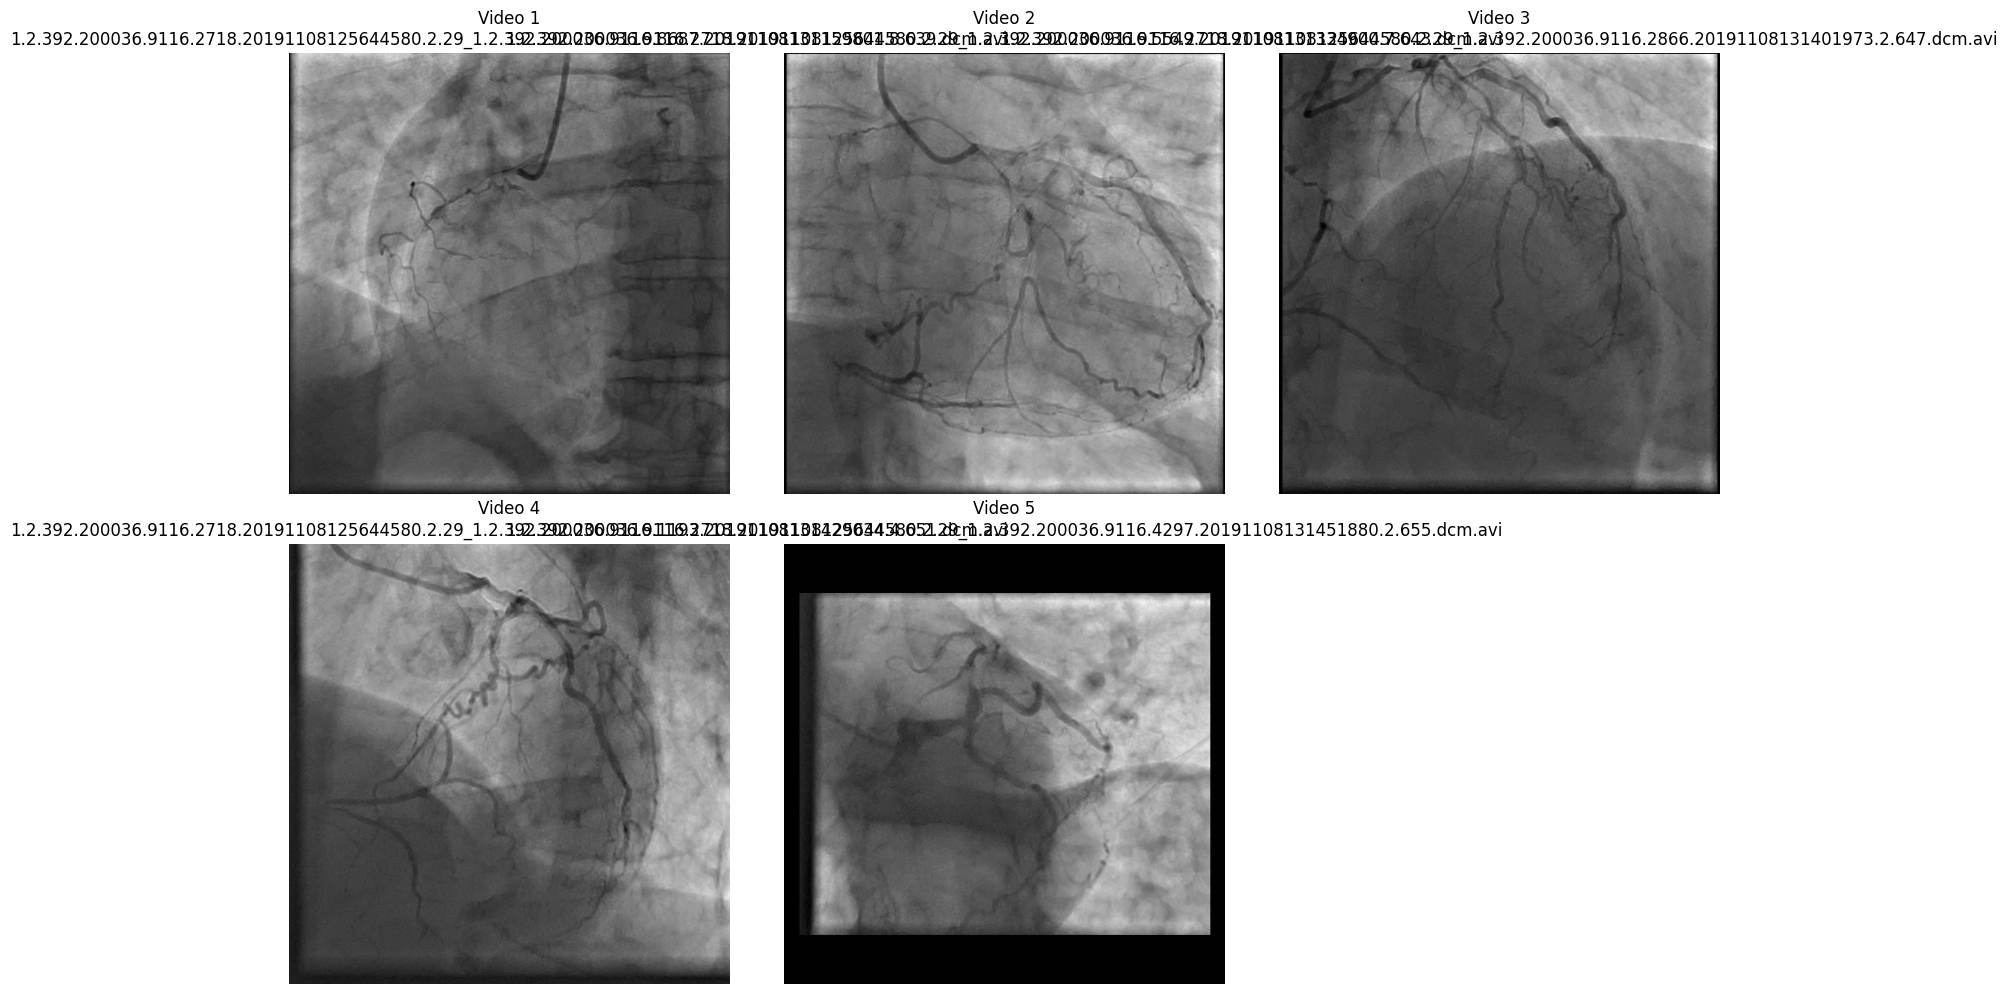

In [11]:
def plot_middle_frames(df, iloc):
    import cv2
    import matplotlib.pyplot as plt
    
    # Get file list for the specified iloc
    file_list = df.FileName[iloc].split(';')
    
    # Calculate number of rows and columns for subplot
    n_files = len(file_list)
    n_cols = min(3, n_files)
    n_rows = (n_files + n_cols - 1) // n_cols
    
    # Create figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    # Process each video file
    for idx, file_path in enumerate(file_list):
        if idx >= len(axes):
            break
            
        # Read video
        cap = cv2.VideoCapture(file_path)
        if not cap.isOpened():
            print(f"Error opening video file: {file_path}")
            continue
            
        # Get total frames
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        middle_frame = total_frames // 2
        
        # Set position to middle frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame)
        ret, frame = cap.read()
        
        if ret:
            # Convert BGR to RGB
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            axes[idx].imshow(frame_rgb)
            axes[idx].set_title(f'Video {idx+1}\n{file_path.split("/")[-1]}')
            axes[idx].axis('off')
        
        cap.release()
    
    # Hide empty subplots
    for idx in range(len(file_list), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage:
plot_middle_frames(df, 1)

In [12]:
display(df.iloc[1].filter(regex='_stenosis'))
display(df.head(n=1))

predicted_leftmain_stenosis            4.0
leftmain_stenosis                     70.0
predicted_lad_stenosis                70.0
lad_stenosis                          95.0
predicted_mid_lad_stenosis            45.0
mid_lad_stenosis                     100.0
predicted_dist_lad_stenosis            0.0
dist_lad_stenosis                      0.0
predicted_diagonal_stenosis           32.0
diagonal_stenosis                      0.0
predicted_D2_stenosis                  0.0
D2_stenosis                            0.0
predicted_D3_stenosis                  0.0
D3_stenosis                            0.0
predicted_lcx_stenosis                30.0
lcx_stenosis                         100.0
predicted_dist_lcx_stenosis            4.0
dist_lcx_stenosis                      0.0
predicted_lvp_stenosis                 0.0
lvp_stenosis                           0.0
predicted_marg_d_stenosis              0.0
marg_d_stenosis                        0.0
predicted_om1_stenosis                12.0
om1_stenosi

,ground_truth_idx,FileName,predicted_leftmain_stenosis,leftmain_stenosis,predicted_leftmain_IFRHYPEREMIE,leftmain_IFRHYPEREMIE,predicted_leftmain_calcif,leftmain_calcif,predicted_lad_stenosis,lad_stenosis,predicted_lad_IFRHYPEREMIE,lad_IFRHYPEREMIE,predicted_lad_calcif,lad_calcif,predicted_mid_lad_stenosis,mid_lad_stenosis,predicted_mid_lad_IFRHYPEREMIE,mid_lad_IFRHYPEREMIE,predicted_mid_lad_calcif,mid_lad_calcif,predicted_dist_lad_stenosis,dist_lad_stenosis,predicted_dist_lad_IFRHYPEREMIE,dist_lad_IFRHYPEREMIE,predicted_dist_lad_calcif,dist_lad_calcif,predicted_diagonal_stenosis,diagonal_stenosis,predicted_diagonal_IFRHYPEREMIE,diagonal_IFRHYPEREMIE,predicted_diagonal_calcif,diagonal_calcif,predicted_D2_stenosis,D2_stenosis,predicted_D2_IFRHYPEREMIE,D2_IFRHYPEREMIE,predicted_D2_calcif,D2_calcif,predicted_D3_stenosis,D3_stenosis,predicted_D3_IFRHYPEREMIE,D3_IFRHYPEREMIE,predicted_D3_calcif,D3_calcif,predicted_lcx_stenosis,lcx_stenosis,predicted_lcx_IFRHYPEREMIE,lcx_IFRHYPEREMIE,predicted_lcx_calcif,lcx_calcif,predicted_dist_lcx_stenosis,dist_lcx_stenosis,predicted_dist_lcx_IFRHYPEREMIE,dist_lcx_IFRHYPEREMIE,predicted_dist_lcx_calcif,dist_lcx_calcif,predicted_lvp_stenosis,lvp_stenosis,predicted_lvp_IFRHYPEREMIE,lvp_IFRHYPEREMIE,predicted_lvp_calcif,lvp_calcif,predicted_marg_d_stenosis,marg_d_stenosis,predicted_marg_d_IFRHYPEREMIE,marg_d_IFRHYPEREMIE,predicted_marg_d_calcif,marg_d_calcif,predicted_om1_stenosis,om1_stenosis,predicted_om1_IFRHYPEREMIE,om1_IFRHYPEREMIE,predicted_om1_calcif,om1_calcif,predicted_om2_stenosis,om2_stenosis,predicted_om2_IFRHYPEREMIE,om2_IFRHYPEREMIE,predicted_om2_calcif,om2_calcif,predicted_om3_stenosis,om3_stenosis,predicted_om3_IFRHYPEREMIE,om3_IFRHYPEREMIE,predicted_om3_calcif,om3_calcif,predicted_prox_rca_stenosis,prox_rca_stenosis,predicted_prox_rca_IFRHYPEREMIE,prox_rca_IFRHYPEREMIE,predicted_prox_rca_calcif,prox_rca_calcif,predicted_mid_rca_stenosis,mid_rca_stenosis,predicted_mid_rca_IFRHYPEREMIE,mid_rca_IFRHYPEREMIE,predicted_mid_rca_calcif,mid_rca_calcif,predicted_dist_rca_stenosis,dist_rca_stenosis,predicted_dist_rca_IFRHYPEREMIE,dist_rca_IFRHYPEREMIE,predicted_dist_rca_calcif,dist_rca_calcif,predicted_RVG1_stenosis,RVG1_stenosis,predicted_RVG1_IFRHYPEREMIE,RVG1_IFRHYPEREMIE,predicted_RVG1_calcif,RVG1_calcif,predicted_RVG2_stenosis,RVG2_stenosis,predicted_RVG2_IFRHYPEREMIE,RVG2_IFRHYPEREMIE,predicted_RVG2_calcif,RVG2_calcif,predicted_pda_stenosis,pda_stenosis,predicted_pda_IFRHYPEREMIE,pda_IFRHYPEREMIE,predicted_pda_calcif,pda_calcif,predicted_posterolateral_stenosis,posterolateral_stenosis,predicted_posterolateral_IFRHYPEREMIE,posterolateral_IFRHYPEREMIE,predicted_posterolateral_calcif,posterolateral_calcif,predicted_bx_stenosis,bx_stenosis,predicted_bx_IFRHYPEREMIE,bx_IFRHYPEREMIE,predicted_bx_calcif,bx_calcif,predicted_lima_or_svg_stenosis,lima_or_svg_stenosis,predicted_lima_or_svg_IFRHYPEREMIE,lima_or_svg_IFRHYPEREMIE,predicted_lima_or_svg_calcif,lima_or_svg_calcif,predicted_coronary_dominance,coronary_dominance
0,2245,/media/data1/ravram/MHI_CATH_DICOM_VIDEOS/2022/1.2.392.200036.9116.1467.20221111171519122.4.2_1.2.392.200036.9116.3942.20221111181713392.3.36.dcm.avi;/media/data1/ravram/MHI_CATH_DICOM_VIDEOS/2022...,62.0,70.0,NaN,NaN,Calcifications minimes,Calcifications minimes,38.0,70.0,NaN,NaN,Calcification importantes,Calcifications minimes,30.0,0.0,NaN,NaN,Calcifications minimes,NaN,4.0,0.0,NaN,NaN,NaN,NaN,30.0,70.0,NaN,NaN,Calcifications minimes,Calcifications minimes,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,14.0,70.0,NaN,NaN,NaN,NaN,0.0,20.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,40.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,18.0,20.0,NaN,NaN,NaN,NaN,4.0,40.0,NaN,NaN,NaN,NaN,0.0,50.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_dominant,right_dominant
